<a href="https://colab.research.google.com/github/ednavivianasegura/ERAP_Curso_R/blob/main/ERAP_R_Course_moduloIII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: Manipulación de datos con R - Módulo III (Visualización de Datos con ggplot2)

Autor(es): Edna Viviana Segura Alvarado - Hans Mauricio Carrillo Hernández

Fecha: 2025-06

Institución: Universidad de La Rioja

# ¿Qué es ggplot2?
ggplot2 es un paquete del lenguaje R para crear gráficos de manera declarativa y elegante. Es parte del ecosistema **tidyverse** y está diseñado para generar gráficos a partir de datos organizados en data frames (tibbles o similares) (tidy data).

Se basa en la Gramática de los Gráficos (Grammar of Graphics), que  establece un sistema coherente para construir visualizaciones a partir de componentes independientes que se pueden combinar.

A grandes rasgos, se compone de la siguiente manera:

```
ggplot(data = <datos>) +
  aes(x = <var_x>, y = <var_y>) +
  geom_<tipo>() +
  otros_componentes()

```
- La estética o atributos-propiedades visuales de la geometría (**aes()**):

Define cómo se *mapean* las variables de los datos a propiedades visuales del gráfico: posición en los ejes, color, forma, tamaño, etc. No dibuja nada por sí misma, solo establece qué variable va en qué parte del gráfico, lo que crea es el **lienzo**.

Por ejemplo en
```
aes(x = displ, y = hwy)
```
nos está diciendo que la variable **displ** (cilindrada del motor) irá en el eje **x** y **hwy** (rendimiento en autopista) irá en el eje **y**.


Valores estéticos comunes:

| Estética        | ¿Dónde se aplica?        | Tipo de variable    | Descripción                                                                                                                                                                                    |
| --------------- | ------------------------ | ------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **`color`**     | Bordes (líneas, puntos)  | Discreta o continua | Define el **color del contorno** de los elementos gráficos, como puntos o líneas. En variables categóricas, genera una paleta automática; en variables continuas, crea un gradiente.           |
| **`fill`**      | Áreas (barras, cajas...) | Discreta o continua | Controla el **color de relleno** de formas cerradas: barras, cajas, polígonos. Muy útil en `geom_bar()`, `geom_boxplot()`, `geom_col()`...                                                     |
| **`size`**      | Puntos, líneas           | Continua            | Controla el **tamaño de los puntos o el grosor de líneas**. Suele usarse para representar una tercera variable en gráficos de dispersión.                                                      |
| **`linewidth`** | Líneas                   | Continua            | Define el **grosor de las líneas** (equivalente a `size`, pero específico para líneas desde `ggplot2` v3.4+). Mejora la claridad al usar líneas múltiples con distintos anchos.                |
| **`shape`**     | Puntos (`geom_point`)    | Discreta            | Determina la **forma del punto** (círculo, triángulo, cruz, etc.). Ideal para variables categóricas. Hay 25 formas disponibles, algunas con relleno (`fill`) y otras solo con borde (`color`). |



Es importante nota que los valores dentro de aes() deben ser columnas del conjunto de datos.


- La geometría de los elementos (**geom_*()**):

Cada función geom_*() representa una capa geométrica: es decir, una forma gráfica que se dibuja sobre el gráfico (como puntos, líneas, barras, cajas, etiquetas, etc.).

Estas capas se suman con el operador + para construir el gráfico de forma modular. Cada capa puede representar un aspecto distinto del gráfico (como datos individuales, promedios, tendencias...), y se pueden superponer unas a otras.

```
ggplot(mpg, aes(x = displ, y = hwy)) +
  geom_point() +                          # Capa de puntos
  geom_smooth(method = "lm", se = FALSE) # Capa de línea de tendencia
```
En este ejemplo, el gráfico se compone de dos capas geométricas superpuestas:
Una que muestra cada observación como un punto (geom_point()), colocando puntos según los valores de **x** e **y** definidos en aes(). Y otra que añade una línea de regresión (geom_smooth()), calculada sobre los mismos datos.

**Nota:**
Podemos pensar en un gráfico como un "lienzo", donde cada geom_*() es una capa de pintura: podemos dibujar puntos, luego agregar líneas, cajas, etiquetas... todo sobre la misma base.

**Geometrías comunes (que iremos viendo según el tipo de variable)**

| Geometría (`geom_*`)           | Tipo de variable X  | Tipo de variable Y  | Uso común                                           |
| ------------------------------ | ------------------- | ------------------- | --------------------------------------------------- |
| `geom_point()`                 | Continua o discreta | Continua            | Diagrama de dispersión                              |
| `geom_line()`                  | Continua            | Continua            | Serie temporal o curvas                             |
| `geom_smooth()`                | Continua            | Continua            | Tendencia o regresión                               |
| `geom_bar(stat = "count")`     | Discreta            | -                   | Conteo de categorías                                |
| `geom_col()`                   | Discreta            | Continua            | Altura basada en valor numérico                     |
| `geom_boxplot()`               | Discreta            | Continua            | Comparar distribuciones                             |
| `geom_violin()`                | Discreta            | Continua            | Distribuciones suavizadas                           |
| `geom_histogram()`             | Continua            | -                   | Distribución de frecuencias                         |
| `geom_density()`               | Continua            | -                   | Distribución suavizada                              |
| `geom_area()`                  | Continua            | Continua            | Área bajo curva (acumulada)                         |
| `geom_jitter()`                | Discreta o continua | Continua            | Puntos dispersos con ruido para evitar solapamiento |
| `geom_boxplot()`               | Discreta (x)        | Continua (y)        | Comparación de rangos y medianas                    |
| `geom_dotplot()`               | Discreta            | Discreta o continua | Distribución por acumulación de puntos              |
| `geom_tile()`                  | Discreta            | Discreta            | Mapa de calor con categorías                        |
| `geom_rug()`                   | Continua            | -                   | Indicadores marginales en los ejes                  |
| `geom_text()` / `geom_label()` | Discreta o continua | Discreta o continua | Añadir etiquetas a los puntos                       |



In [7]:
# @title Librerías: (Instalación e importación)

# Función para instalar si no está instalado
instalar_si_no <- function(paquete) {
    if (!requireNamespace(paquete, quietly = TRUE)) {
    install.packages(paquete, repos = "https://cloud.r-project.org")
  }
  library(paquete, character.only = TRUE)
}

# Lista de paquetes a verificar
paquetes <- c("rnaturalearth", "rnaturalearthdata", "sf", "dplyr", "ggplot2", "devtools", "maps", "nycflights13")

# Instalar y cargar todos
invisible(lapply(paquetes, instalar_si_no))
devtools::install_github("ropensci/rnaturalearthhires")

# Cargar paquetes
# library(sf) sf = Simple Features, es un estándar internacional (ISO)
# para representar objetos geográficos como puntos, líneas, polígonos, etc.
# library(rnaturalearth) y library(rnaturalearthdata) # Son paquetes que permiten descargar
# y cargar mapas vectoriales del mundo (países, estados, ríos, etc.) desde el proyecto Natural Earth
#library(maps)Carga mapas de estados y regiones de EEUU


Attaching package: ‘rnaturalearthdata’


The following object is masked from ‘package:rnaturalearth’:

    countries110


Linking to GEOS 3.12.1, GDAL 3.8.4, PROJ 9.3.1; sf_use_s2() is TRUE


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: usethis

Skipping install of 'rnaturalearthhires' from a github remote, the SHA1 (153b0ea5) has not changed since last install.
  Use `force = TRUE` to force installation



Veremos un ejemplo con datos de laboratorio (datos incluídos en la librería ggplo2).

**Conjunto de datos: mpg**

El dataset mpg proviene del paquete ggplot2 y contiene información sobre el rendimiento de modelos de automóviles en EE.UU., recogida por la Agencia de Protección Ambiental (EPA). Es ideal para aprender a visualizar relaciones entre variables cuantitativas y cualitativas.


| Variable       | Tipo              | Descripción                                                             |
| -------------- | ----------------- | ----------------------------------------------------------------------- |
| `manufacturer` | Categórica        | Marca del automóvil (ej. "audi", "ford")                                |
| `model`        | Categórica        | Modelo del vehículo                                                     |
| `displ`        | Numérica continua | Cilindrada del motor (en litros)                                        |
| `year`         | Numérica discreta | Año de fabricación (1999 o 2008)                                        |
| `cyl`          | Numérica discreta | Número de cilindros del motor                                           |
| `trans`        | Categórica        | Tipo de transmisión (automática/manual)                                 |
| `drv`          | Categórica        | Tipo de tracción (`f` = delantera, `r` = trasera, `4` = tracción total) |
| `cty`          | Numérica continua | Consumo de combustible en ciudad (millas por galón)                     |
| `hwy`          | Numérica continua | Consumo de combustible en autopista (mpg)                               |
| `fl`           | Categórica        | Tipo de combustible (`p` = gasolina, `d` = diésel, etc.)                |
| `class`        | Categórica        | Clase del vehículo (compacto, SUV, minivan...)                          |


Comenzamos conla creación de diferentes gráficos:

¿Qué tipo de relación vemos entre estas dos variables?:

En general, motores más grandes (más cilindrada) consumen más combustible, lo que se traduce en menor rendimiento en autopista. Este patrón es esperable, y el gráfico lo representa de forma clara y visual.

## Ejercicios:

### Una variable continua:

1. Realiza un gráfico de dispersión del consumo de combutible en autopista en función del número de cilindros del motor

2. ¿Qué sucede si hacemos un gráfico de dispersión de la variable *clase* versus tipo de traccion?

3. Crear un gráfico de densidad para la variable rendimiento en autopista

4. Crear un diagrama de puntos agrupados para el rendimiento en la autopista, explorar opciones para cambiar el relleno de negro a rosa ( o al color deseado).

5. Crear un poligono de frecuencias para el rendimiento en la autopista, explorar opciones para cambiar el color y grosor de la línea.

### Una variable discreta:

1. Generar un gráfico para el conteo de las frecuencias de la variable clase. Explorar las opciones disponibles para cambiar el color del relleno y de los bordes de las barras.

### Geometrías para representar dos variables continuas.

Estas permiten analizar la relación entre variables numéricas.

1. Crear un gráfico de dispersión clásico entre cilindrada y rendimiento en autopista, modificando la forma, el color del relleno, el color del borde, el grosor del borde y el tamaño de los puntos.

2. Generar un gráfico geom_jitter para la comparación entre cilindrada y rendimiento en autopista y compara el resultado con el gráfico geom_point().

Modifica los parámetros ( width, height, size,   color, alpha, shape, fill, y stroke)

¿Qué diferencias observas?
¿Qué utilidad le ves?



| Característica                | `geom_point()`                | `geom_jitter()`                                          |
| ----------------------------- | ----------------------------- | -------------------------------------------------------- |
| Precisión de ubicación        | Alta (usa valores exactos)    | Baja (introduce desplazamiento aleatorio)                |
| Visualización de solapamiento | Baja (puntos se sobreponen)   | Alta (puntos se dispersan visualmente)                   |
| Ideal para...                 | Datos únicos o sin repetición | Datos con muchas observaciones idénticas o discretizadas |


3. Realiza un diagrama de manta o tapete:

**geom_rug()** añade pequeñas marcas (como alfileres o "tapetes") en los bordes del gráfico para mostrar dónde hay observaciones individuales en cada eje.

Las rayitas negras a lo largo de la parte inferior indican los valores donde hay autos con esa cilindrada.

Si se ven muchas rayas muy juntas o superpuestas, significa que muchos autos tienen la misma cilindrada o muy similares.

Las marcas en el borde izquierdo indican las observaciones según su rendimiento en autopista.

Si una raya es más gruesa o más intensa, puede ser que varias observaciones compartan ese mismo valor.

Comparativa de los tres gráficos juntos:

| Geometría       | ¿Qué muestra?                        | ¿Cuándo usar?                        |
| --------------- | ------------------------------------ | --------------------------------------- |
| `geom_point()`  | Relación precisa entre dos variables | No hay mucho solapamiento               |
| `geom_jitter()` | Relación dispersa (con ruido visual) | Hay valores repetidos que se solapan    |
| `geom_rug()`    | Densidad marginal en cada eje        | Cuando se quiere reforzar la idea de acumulación |


### Geometrías para representar dos variables (una continua y una discreta).

1. Diagrama de barras **geom_col()**: Generar un diagrama de barras que muestre el rendimiento promedio en autopista (hwy) de los automóviles agrupados por su clase (class), como SUV, compacto, minivan, etc. Modifica atributos de la función.


Es ideal para mostrar comparación directa de valores agregados por grupo.

2. geom_boxplot() – Diagrama de caja y bigotes:
   **geom_boxplot()** resume una variable continua mostrando su mediana, cuartiles y posibles valores atípicos por grupo.

Escribe el código para generar un diagrama de caja que muestre la distribución del rendimiento en autopista (hwy) de los vehículos, agrupados por su clase (class).
Modificar los parámetros necesarios para cambiar el color del relleno, color de los valores extremos, ancho de las cajas, etc.

¿Cómo puedo agregar el valor de la media a cada caja?


Cada caja representa el rango intercuartílico (del primer al tercer cuartil), la línea dentro de la caja indica la mediana, y los bigotes se extienden hasta 1.5 veces el rango intercuartílico.
Este tipo de gráfico facilita la comparación de la dispersión, la simetría y la presencia de valores extremos en distintos grupos.

3. geom_violin() – Densidad suavizada por grupo:

**geom_violin()** combina la funcionalidad de un boxplot con un gráfico de densidad. Muestra la forma de la distribución por categoría.

Crea un gráfico de violín para visualizar la distribución del rendimiento en autopista (hwy) de los automóviles, agrupados por su clase (class). Modifica distintas opciones de relleno, transparencia, mostrar cuartiles.

Este tipo de gráfico combina la información de un boxplot (mediana, cuartiles) con una estimación de densidad suavizada, permitiendo observar la forma de la distribución (asimetrías, concentración de valores, presencia de múltiples modas).
Cada "violín" representa la densidad de valores a lo largo del eje vertical, mostrando con mayor grosor las zonas donde se concentran más observaciones.

A continuación podemos ver un ejemplo de **suma de capas geométricas**, mezclando boxplot, violin y stat_summary.
Modifica distintos parámetros de las geometrías, e iintercambia el orden.

**NOTA**

Vemos que los límites son la creatividad.

### Diferencias entre Atributos y Mapeos:

**Mapeos**: un mapeo estético es una asignación de una variable de los datos a una propiedad visual del gráfico: posición, color, tamaño, forma, etc, que se define dentro de la función aes().
Por ejemplo,


```
ggplot(mpg, aes(x = displ, y = hwy, color = class))
```
Vemos que el eje **x** mostrará displ (cilindrada), y el eje **y** mostrará hwy (rendimiento en autopista).
El color de los puntos dependerá de la variable class (clase del vehículo). En este caso, cada grupo de datos tendrá un color distinto automáticamente, y se generará una leyenda.

**Atributos fijos**: un atributo fijo es un valor visual que se asigna manualmente, igual para todos los datos, y se coloca fuera de aes().
Por ejemplo:


```
ggplot(mpg, aes(x = displ, y = hwy)) +
  geom_point(color = "steelblue", size = 3)
```
Todos los puntos tendrán el mismo color (steelblue), y todos los puntos tendrán el mismo tamaño (3). Así mismo, no se genera leyenda, porque no hay relación con ninguna variable.



**Resumen comparativo:**


| Característica         | **Mapeo (`aes()`)**                | **Atributo fijo (fuera de `aes()`)** |
| ---------------------- | ---------------------------------- | ------------------------------------ |
| Se relaciona con datos | Sí                               |  No                                 |
| Se define en `aes()`   | Sí                               |  No                                 |
| Genera leyenda         | Sí (si es visual)                |  No                                 |
| Permite variación      | Cada punto puede verse diferente |  Todos los puntos se ven igual      |
| Ejemplo                | `aes(color = class)`               | `color = "red"`                      |


Es decir, cuando usamos aes(), le decimos a ggplot2 que tome una **variable del dataset** y la convierta en una **propiedad visual** del gráfico. En cambio, cuando usamos un **atributo fijo**, estamos asignando manualmente un valor constante a esa **propiedad** para todos los elementos del gráfico.

Veamos un ejemplo paso a paso de un diagrama de puntos entre :

## Etiquetas:

Las etiquetas en ggplot2 se controlan principalmente mediante la función **labs()**, que permite personalizar los títulos y descripciones de los ejes y otros elementos del gráfico.

| Parámetro  | Qué etiqueta modifica                    |
| ---------- | ---------------------------------------- |
| `title`    | Título principal del gráfico             |
| `subtitle` | Subtítulo debajo del título              |
| `caption`  | Texto explicativo en la esquina inferior |
| `x`        | Etiqueta del eje X                       |
| `y`        | Etiqueta del eje Y                       |
| `fill`     | Etiqueta de la leyenda para `fill`       |
| `color`    | Etiqueta de la leyenda para `color`      |
| `size`     | Etiqueta de la leyenda para `size`       |
| `shape`    | Etiqueta de la leyenda para `shape`      |
| `linetype` | Etiqueta de la leyenda para `linetype`   |


Usar **labs()** es equivalente a poner las etiquetas directamente en ggtitle(), xlab(), ylab(), pero más limpio y centralizado.

Se puede usar al final de la cadena + para que se aplique a todo el gráfico.

Si se necesita eliminar una etiqueta, debe pasarse como NULL (por ejemplo, x = NULL).

## FACETS:

Facets son una forma de dividir un gráfico en varios subgráficos más pequeños (también llamados paneles-rejillas), cada uno mostrando un subconjunto de los datos.

Es como crear una cuadrícula de gráficos, donde cada uno representa un grupo diferente según una variable categórica.

Por ejemplo, imaginemos que queremos conocer el consumo de combustible de coches, viendo un gráfico de dispersión por cada tipo de transmisión (auto, manual). En vez de hacer un gráfico nuevo para cada uno, ggplot2 los divide automáticamente en paneles pequeños usando facet_wrap() o facet_grid().

### Tipos de facet
1. facet_wrap(~ variable)

Crea una fila o rejilla de paneles según una única variable categórica. Es el más común y fácil de usar.

Por ejemplo, si queremos ver el consumo de combustible en función de la cilindrada del coche segmentado por las clases de coche, debemos hacer un código como el que sigue:

Esto divide el gráfico en un panel por cada clase de vehículo (compact, suv, etc.).

2. facet_grid(fila ~ columna)

Permite dividir los paneles en dos dimensiones, por filas y columnas. Ideal para explorar la combinación de dos variables categóricas.

Este código crea una matriz de gráficos donde las filas representan tipos de tracción (drv) y las columnas el número de cilindros (cyl).

Se puede realizar **personalización de facets**:

Modificando etiquetas, títulos, escalas, etc.

- scales = "free": Permite que cada panel tenga sus propios ejes.
- labeller = label_both: Muestra tanto el nombre de la variable como el valor.

```
facet_wrap(~ class, scales = "free", labeller = label_both)
```



Cuando usas facet_wrap() o facet_grid() para crear múltiples paneles (uno por grupo), por defecto todos los gráficos comparten los mismos ejes x e y. Esto ayuda a comparar, pero puede no ser útil si los rangos son muy diferentes entre grupos.

Ahí es donde entra **scales = "free"**: que permite liberar los ejes para que cada panel tenga su propio rango.

En el ejemplo a acontinuación, cada panel (class) ajusta sus propios ejes para adaptarse mejor a los datos.

Esto es útil cuando algunos grupos tienen valores muy altos y otros muy bajos, y se perderían los detalles si todos usaran la misma escala.

**Otras opciones de scales**

| Opción                  | ¿Qué hace?                                            |
| ----------------------- | ----------------------------------------------------- |
| `"fixed"` (por defecto) | Todos los paneles comparten los mismos ejes.          |
| `"free"`                | Libera ambos ejes (`x` e `y`).                        |
| `"free_x"`              | Solo libera el eje **x**; el eje y se mantiene común. |
| `"free_y"`              | Solo libera el eje **y**; el eje x se mantiene común. |


## Temas (Themes):

En ggplot2, los temas son plantillas que controlan el estilo visual de un gráfico, es decir:

- Colores de fondo
- Líneas de cuadrícula
- Tipos de letra
- Bordes de paneles
- Posición de leyendas
- Tamaños y estilos de texto
- Márgenes, títulos, etc.

**Importante**: Los temas no afectan los datos ni el tipo de gráfico, solo cambian su apariencia estética.

Los **temas** se aplican con la función theme_*() al final de la cadena del gráfico:

```
ggplot(...) +
  geom_point(...) +
  theme_minimal()
```

Los temas predefinidos en ggplot2:

| Tema              | Descripción breve                                                   |
| ----------------- | ------------------------------------------------------------------- |
| `theme_gray()`    | Tema por defecto (con fondo gris y cuadrícula blanca)               |
| `theme_bw()`      | Fondo blanco con bordes y cuadrículas más marcados                  |
| `theme_minimal()` | Muy simple, sin bordes ni cuadrícula de fondo                       |
| `theme_classic()` | Estilo clásico: ejes visibles, sin fondo ni cuadrículas             |
| `theme_light()`   | Fondo blanco con cuadrículas claras                                 |
| `theme_dark()`    | Fondo oscuro (útil para pantallas o contrastes fuertes)             |
| `theme_void()`    | Casi vacío, sin ejes, etiquetas ni cuadrícula (gráficos artísticos) |



**¿En qué consiste element_text()?**

element_text() es una función que define el estilo visual de un texto en un gráfico ggplot2.

Se usa dentro de theme() para controlar cómo se ve cada componente textual del gráfico: tamaño de letra, color, alineación, tipo de fuente, ángulo, etc.

¿En dónde se usa?

| Parte del gráfico    | Clave en `theme()` |
| -------------------- | ------------------ |
| Título               | `plot.title`       |
| Subtítulo            | `plot.subtitle`    |
| Etiqueta eje X       | `axis.title.x`     |
| Etiqueta eje Y       | `axis.title.y`     |
| Texto de ticks eje X | `axis.text.x`      |
| Texto de ticks eje Y | `axis.text.y`      |
| Título de leyenda    | `legend.title`     |
| Texto de leyenda     | `legend.text`      |
| Fuente o caption     | `plot.caption`     |

¿Qué atributos tiene element_text()?:

| Atributo     | Qué controla                                           | Ejemplo            |
| ------------ | ------------------------------------------------------ | ------------------ |
| `size`       | Tamaño del texto (en puntos)                           | `size = 14`        |
| `face`       | Tipo de fuente: `"plain"`, `"bold"`, etc.              | `face = "bold"`    |
| `color`      | Color del texto                                        | `color = "blue"`   |
| `hjust`      | Alineación horizontal (0 = izq, 0.5 = centro, 1 = der) | `hjust = 0.5`      |
| `vjust`      | Alineación vertical                                    | `vjust = 1`        |
| `angle`      | Rotación del texto (en grados)                         | `angle = 45`       |
| `family`     | Fuente del texto                                       | `family = "Times"` |
| `lineheight` | Espaciado entre líneas                                 | `lineheight = 1.2` |


Por ejemplo:

Si quiero personalizar también el eje x, el eje y...:

# Ejemplo de creación del mapa de un país

(Ejercicio iniciado en el módulo I)


Warning message:
“Removed 7 rows containing missing values or values outside the scale range
(`geom_segment()`).”


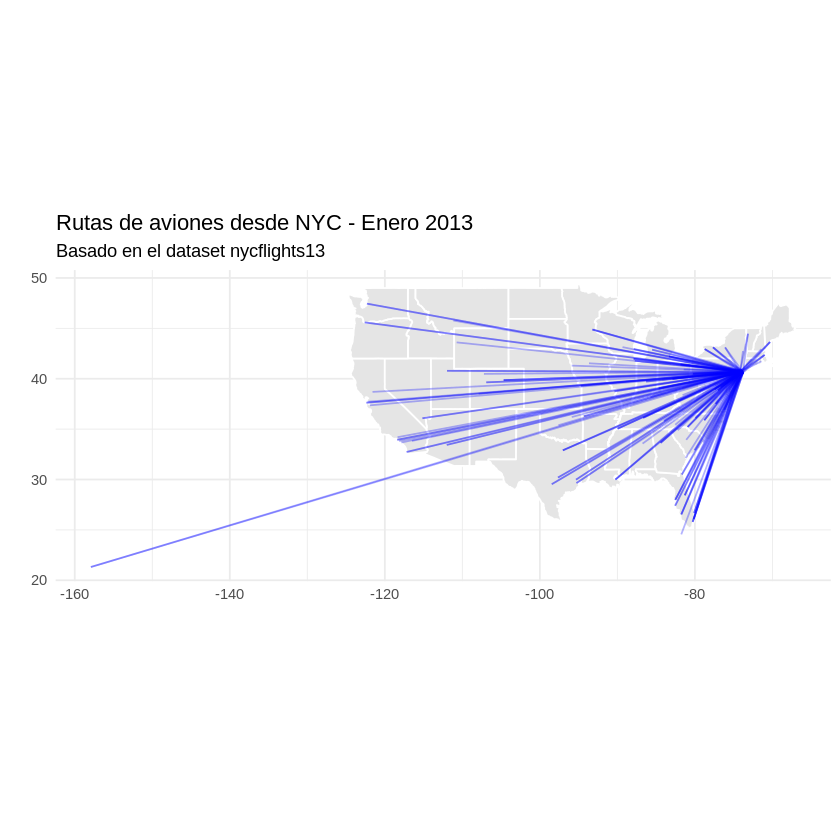

In [8]:
# 1. Filtrar vuelos desde NYC en enero de 2013
vuelos_ny <- flights %>%
  filter(month == 1) %>%         # Filtrar solo vuelos de enero
  select(origin, dest) %>%       # Seleccionar columnas de origen y destino
  distinct()                     # Eliminar duplicados para tener rutas únicas

# 2. Obtener coordenadas de los aeropuertos de origen
origenes <- vuelos_ny %>%
  select(faa = origin) %>%       # Renombrar columna para hacer join
  distinct() %>%                 # Asegurar que no haya duplicados
  left_join(airports, by = "faa") %>%  # Unir con tabla de aeropuertos
  select(faa,                   # Seleccionar identificador del aeropuerto
         lon_origen = lon,     # Renombrar longitud del origen
         lat_origen = lat)     # Renombrar latitud del origen

# 2b. Obtener coordenadas de los aeropuertos de destino
destinos <- vuelos_ny %>%
  select(faa = dest) %>%        # Renombrar columna para hacer join
  distinct() %>%
  left_join(airports, by = "faa") %>%
  select(faa,                   # Seleccionar identificador del aeropuerto
         lon_dest = lon,       # Renombrar longitud del destino
         lat_dest = lat)       # Renombrar latitud del destino

# 2c. Unir coordenadas de origen y destino a cada ruta
rutas <- vuelos_ny %>%
  left_join(origenes, by = c("origin" = "faa")) %>%  # Añadir coordenadas de origen
  left_join(destinos, by = c("dest" = "faa"))        # Añadir coordenadas de destino

# 3. Crear mapa base de los Estados Unidos
usa <- map_data("state")  # Datos del contorno de los estados de EE.UU.

# 4. Dibujar el mapa con las rutas de vuelo
ggplot() +
  # Mapa base en gris claro, con bordes blancos
  geom_polygon(data = usa, aes(x = long, y = lat, group = group),
               fill = "gray90", color = "white") +
  # Rutas de vuelo como líneas desde origen hasta destino
  geom_segment(data = rutas,
               aes(x = lon_origen, y = lat_origen,    # punto de inicio
                   xend = lon_dest, yend = lat_dest), # punto final
               color = "blue", alpha = 0.3) +         # líneas azules semitransparentes
  # Mantener proporción entre latitud y longitud
  coord_fixed(1.3) +
  # Títulos y etiquetas
  labs(title = "Rutas de aviones desde NYC - Enero 2013",
       subtitle = "Basado en el dataset nycflights13",
       x = "", y = "") +
  # Tema visual minimalista
  theme_minimal()


**geom_polygon()**

Dibuja polígonos cerrados uniendo puntos (x, y) en orden, y rellenándolos con color.

Sintasis básica:

```
geom_polygon(data = datos, aes(x = long, y = lat, group = group), fill = "gray", color = "white")

```

- x, y: coordenadas de los puntos del polígono.

- group: indica qué puntos forman parte del mismo polígono.

- fill: color del interior.

- color: color del borde.

**geom_segment()**

Dibuja segmentos de línea recta entre dos puntos: uno inicial (x, y) y uno final (xend, yend).

Sintáxis básica:

```
geom_segment(aes(x = lon_origen, y = lat_origen, xend = lon_dest, yend = lat_dest),
             color = "blue", alpha = 0.5)

```

- x, y: coordenadas del punto de partida.

- xend, yend: coordenadas del punto de llegada.

- color: color de la línea.

- alpha: transparencia (0 = invisible, 1 = opaco).

**coord_fixed()**

Fija la relación de aspecto entre los ejes x e y, de forma que 1 unidad en x es igual a 1 unidad en y.

Sinhtáxis básica:

```
coord_fixed(ratio = 1.3)
```
- ratio: relación entre y / x. Por ejemplo, 1 = proporción 1:1; 1.3 estira verticalmente un poco.



**Ejemplo mapa de España**

Analicemos la población por comunidad autónoma

Datos tomados del INE:

[INE-Datos demográficos 2021](https://www.ine.es/jaxiT3/Datos.htm?t=2853#_tabs-tabla)

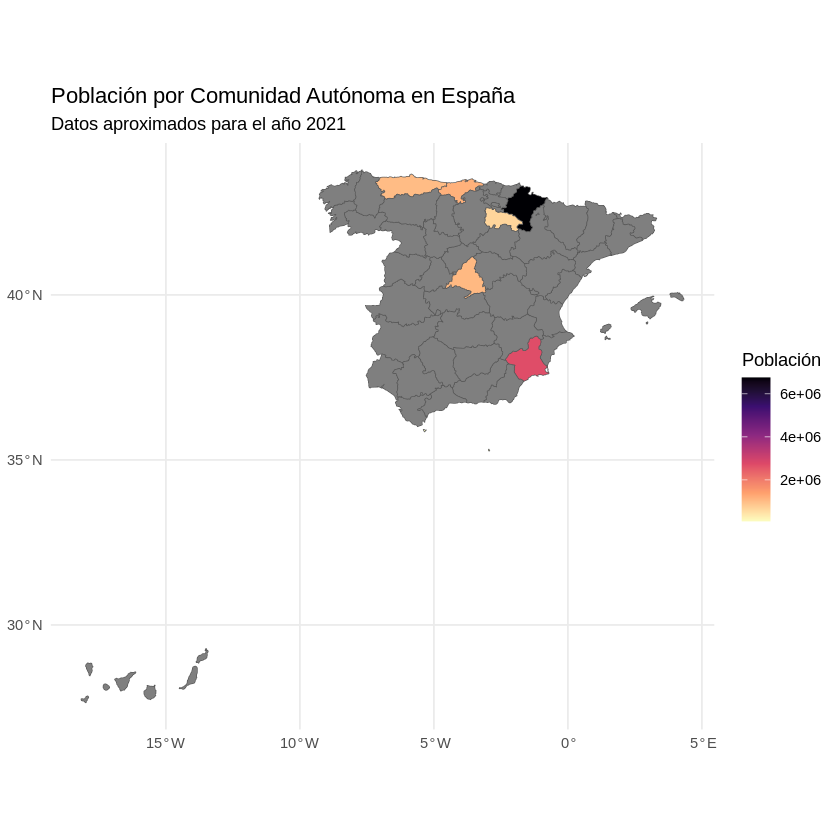

In [14]:
# 1. Obtener mapa de España a nivel de regiones administrativas (comunidades autónomas)
# La función ne_states() descarga un mapa en formato sf desde Natural Earth
espana_mapa <- ne_states(country = "Spain", returnclass = "sf")

# 2. Crear una tabla con datos demográficos: población por comunidad autónoma
# Esta tabla se usará para unirse al mapa, por el nombre de la región (columna "name")
poblacion <- data.frame(
  name = c("Andalucía", "Aragón", "Asturias", "Cantabria", "Castilla y León",
           "Castilla-La Mancha", "Cataluña", "Comunidad Valenciana",
           "Extremadura", "Galicia", "Madrid", "Murcia",
           "Navarra", "País Vasco", "La Rioja", "Islas Baleares", "Islas Canarias", "Ceuta", "Melilla"),
  poblacion = c(8472407,	1326261,	1011792,	1173008,	2172944,	584507,	2383139,
  2049562,	7763362,	5058138,	1059501,	2695645,	6751251,	1518486,
  661537,	2213993,	319796,	83517,	86261)
)

# 3. Unir el mapa con la tabla de población
# La unión se hace por la columna "name", que identifica cada región en el mapa
mapa_completo <- espana_mapa %>%
  left_join(poblacion, by = "name")

# 4. Crear el gráfico con ggplot2
ggplot(data = mapa_completo) +
  # geom_sf dibuja los polígonos geográficos usando la geometría incluida en el objeto sf
  geom_sf(aes(fill = poblacion)) +
  # Usamos una escala de color continua "plasma" (de viridis) para representar la población
  scale_fill_viridis_c(option = "magma", direction = -1, name = "Población") +
  # Títulos y leyenda del gráfico
  labs(title = "Población por Comunidad Autónoma en España",
       subtitle = "Datos aproximados para el año 2021",
       fill = "Población") +
  # Tema minimalista para una apariencia limpia
  theme_minimal()


**geom_sf()**

Permite dibujar directamente geometrías espaciales (puntos, líneas, polígonos) almacenadas en objetos sf, sin necesidad de especificar x e y manualmente.

```
ggplot(data = objeto_sf) +
  geom_sf(aes(fill = variable))

```

| Elemento              | Explicación                                                                      |
| --------------------- | -------------------------------------------------------------------------------- |
| `data = objeto_sf`    | Objeto de clase `sf`, como uno obtenido con `ne_states()` o `st_read()`          |
| `aes(fill = ...)`     | Variable continua o categórica para rellenar los polígonos                       |
| `color`               | Color del borde del polígono                                                     |
| `size`                | Grosor del borde                                                                 |
| `alpha`               | Transparencia                                                                    |
| `geometry = geometry` | (opcional) columna `sf` que contiene la geometría (por defecto es autodetectada) |



**scale_fill_viridis_c()**

Aplica una paleta de colores perceptualmente uniforme proveniente del paquete viridis.

| Argumento   | ¿Qué hace?                                                                                                               |
| ----------- | ------------------------------------------------------------------------------------------------------------------------ |
| `option`    | Elige la paleta de colores. Valores comunes: `"viridis"` (por defecto), `"plasma"`, `"magma"`, `"inferno"`, `"cividis"`. |
| `direction` | Cambia la dirección de la escala: `1` (normal) o `-1` (invertida).                                                       |
| `name`      | Cambia el nombre de la leyenda.                                                                                          |
| `limits`    | Fija los valores mínimo y máximo de la escala.                                                                           |
| `na.value`  | Color para valores faltantes (`NA`).                                                                                     |


# Ejercicios:

1. Clasifique el conjunto de datos entre variables continuas y discretas. Asigne una variable continua al color, al tamaño y a la forma. ¿Cómo se comportan estas estéticas de forma diferente para las variables categóricas y las continuas?

2. ¿Qué ocurre si se asigna la misma variable a varias estéticas?


Cuando se asigna la misma variable a más de una estética dentro de aes(), ggplot2 utiliza esa variable en cada uno de los canales visuales correspondientes. Esto significa que la variable afectará a múltiples aspectos de la geometría, como el color, el tamaño, la forma o la posición.

3. ¿Qué hace la estética stroke en ggplot2?

solución abajo en las ayudas, se puede buscar en internet (en ayuda también de r)

4.  ¿Qué ocurre si asignas una estética a algo que no es una variable, como aes(color = displ < 5)?

La expresión **displ < 5** se evalúa para cada fila del dataset mpg.

El resultado es una nueva variable lógica (TRUE o FALSE).

ggplot2 mapea esos valores lógicos a colores, por lo general usando dos colores contrastantes.

En este ejemplo:
Puntos con displ < 5 se ven de un color (por ejemplo, azul)
Puntos con displ >= 5 se ven de otro (por ejemplo, rojo)

Esto permite crear agrupaciones visuales sin necesidad de modificar el dataset original.

5. ¿Qué ocurre si se aplica una faceta a una variable continua?

Cuando se aplica una faceta (facet_wrap() o facet_grid()) a una variable continua, ggplot2 forzará a esa variable a comportarse como si fuera categórica, es decir, la convertirá internamente en factor.

Esto significa que: cada valor único de la variable continua se tratará como una etiqueta de panel.

El gráfico resultará en muchos paneles individuales, uno por cada valor diferente.

Esto raramente es útil, y puede llevar a gráficos innecesariamente fragmentados y difíciles de leer.

¿Qué opción tendríamos para arreglaro esto?: agrupar previamente la variable continua en intervalos o categorías:


Aquí usamos cut() para transformar hwy en una variable categórica por rangos, lo cual sí tiene sentido para graficar sub-gráficos (facetas.

O bien, usar color, size o alpha como estética visual continua (que sería lo más lógico):

6. ¿Qué significan las celdas vacías en el gráfico con facet_grid(drv ~ cyl)? ¿Qué relación tienen con este gráfico?

Cuando se usa facet_grid(drv ~ cyl), se pide que: en el eje horizontal (columnas) haya una faceta por cada valor de cyl (número de cilindros), en el eje vertical (filas) haya una faceta por cada valor de drv (tipo de tracción: "f", "r", "4"), y se muestren todas las combinaciones posibles de esas dos variables, incluso si no existen datos reales para alguna combinación.
Por lo tanto, las celdas vacías aparecen cuando no hay observaciones en el dataset para esa combinación de drv y cyl. En este caso, no hay autos con drv = "4" y cyl = 5 en el dataset.
En ese caso, facet_grid() aún creará la celda correspondiente, pero estar vacía porque no hay datos para mostrar.

7. crea un gráfico que represente la relación entre la cilindrada del motor (displ) y el rendimiento en autopista (hwy).

El gráfico debe incluir:

- Un diagrama de dispersión de los datos.

- Una línea de tendencia suavizada que permita visualizar el patrón general entre las variables.

8. Modifica el siguiente gráfico para que los puntos estén coloreados según la variable class, y agrega el título: 'Relación entre Cilindrada y Consumo en Carretera'.

In [ ]:
ggplot(mpg, aes(x = displ, y = hwy)) +
  geom_point()

9. Modifica el siguiente gráfico de barras para ordenar las barras de mayor a menor frecuencia y colocarlas horizontalmente. Cambia también el color de las barras.

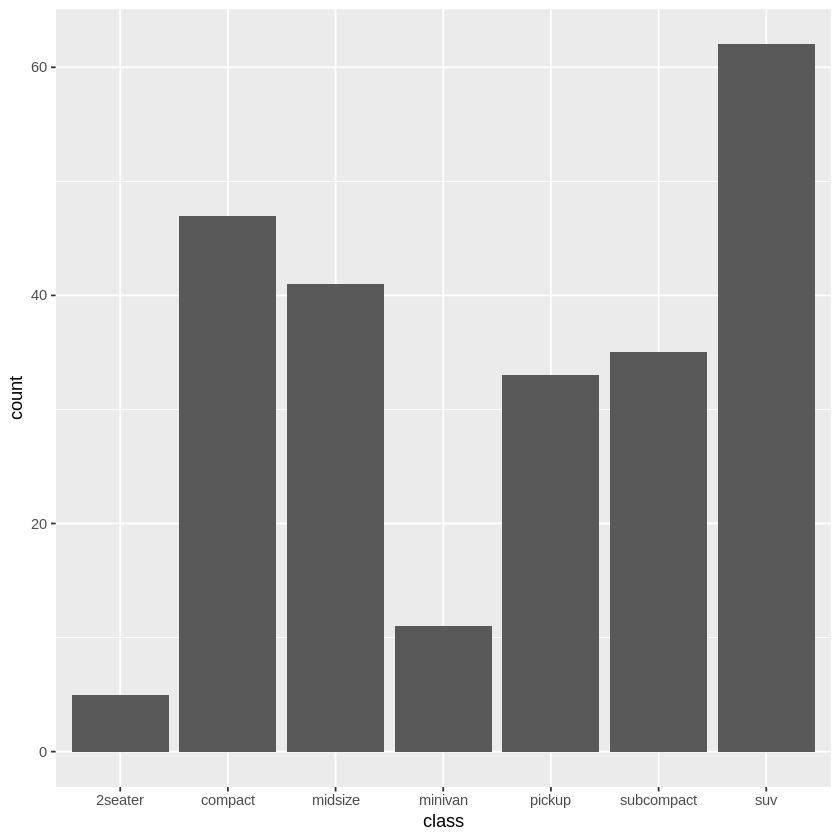

In [15]:
ggplot(mpg, aes(x = class)) +
  geom_bar()

10. Agrega una línea de tendencia lineal al gráfico siguiente, sin el intervalo de confianza, y cambia el color de los puntos a rojo.

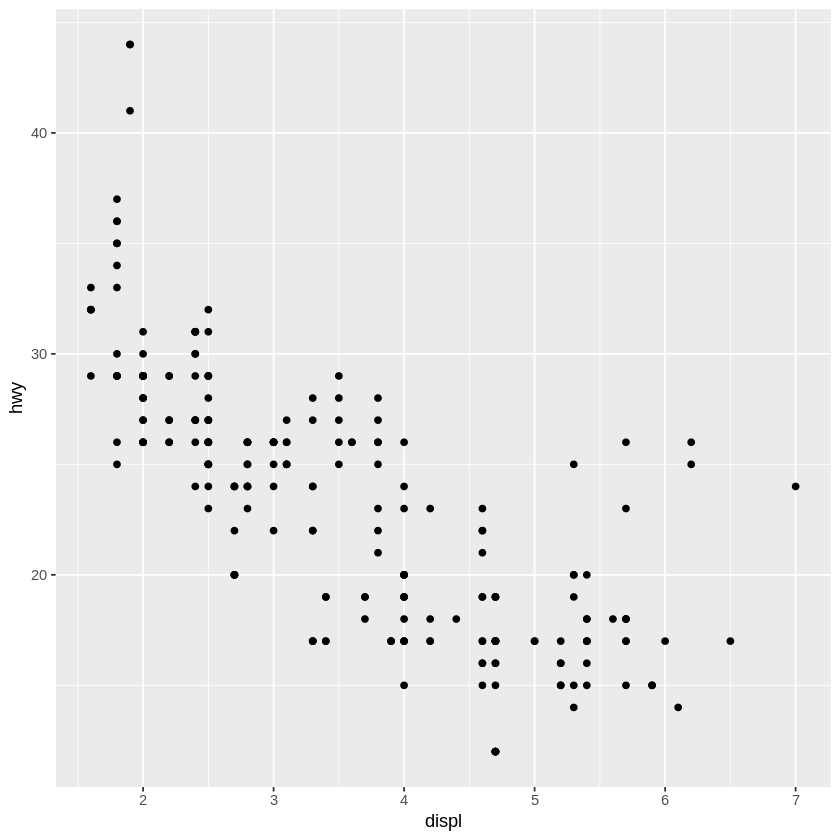

In [16]:
ggplot(mpg, aes(x = displ, y = hwy)) +
  geom_point()

11. Modifica el gráfico para que se divida en paneles usando facet_wrap() según la variable drv.

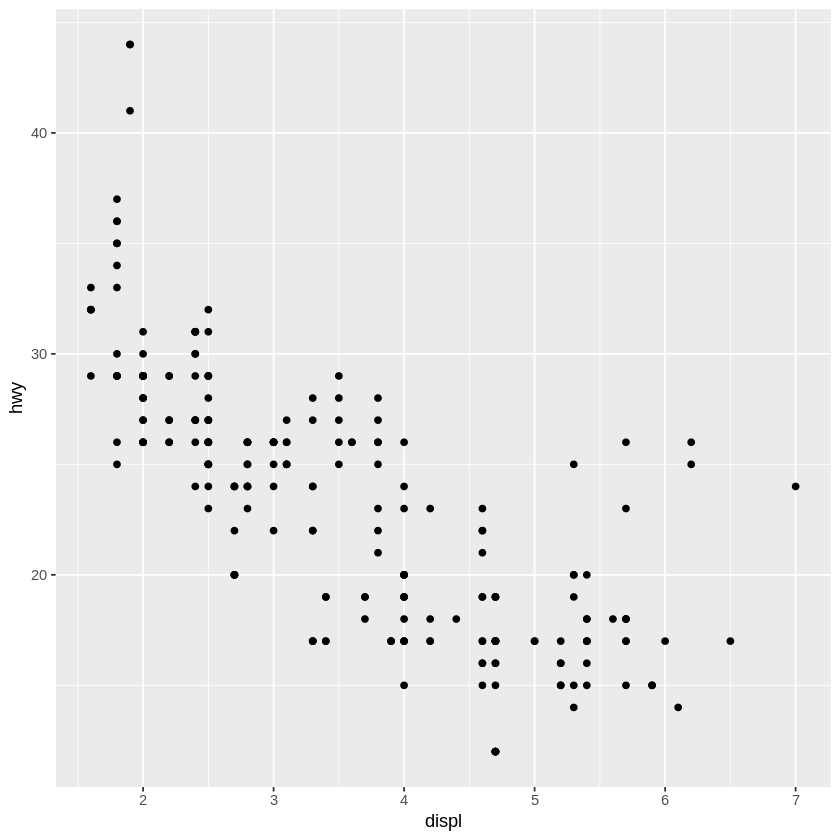

In [17]:
ggplot(mpg, aes(x = displ, y = hwy)) +
  geom_point()


12. Cambia el siguiente histograma para que use 15 bins, barras verdes con borde negro y segmente por tipo de combustible.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


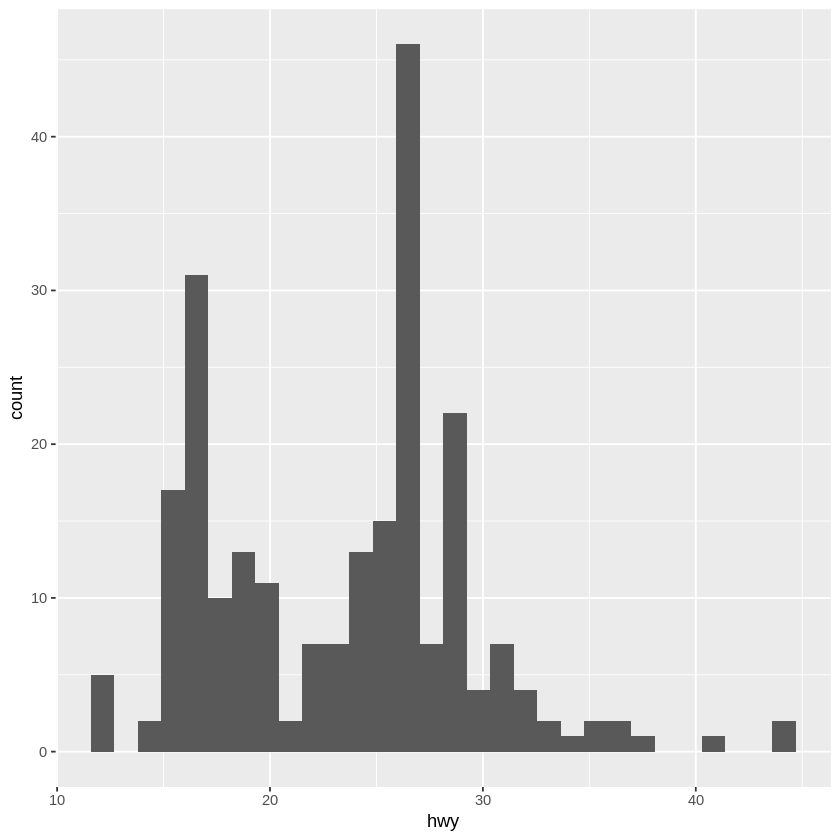

In [18]:

ggplot(mpg, aes(x = hwy)) +
  geom_histogram()

# Ayudas

## Colores:

Puedes usar colores de tres maneras principales:

- Por nombre estándar en inglés (e.g., "red", "steelblue")
- Por código hexadecimal (e.g., "#FF5733")
- Funciones de paletas (scale_*_manual(), scale_*_brewer(), viridis, etc.)

| Color (Inglés)   | Nombre descriptivo (Español) |
|------------------|-------------------------------|
| red              | Rojo                          |
| blue             | Azul                          |
| green            | Verde                         |
| yellow           | Amarillo                      |
| black            | Negro                         |
| white            | Blanco                        |
| gray             | Gris                          |
| orange           | Naranja                       |
| purple           | Morado                        |
| brown            | Marrón                        |
| pink             | Rosa                          |
| cyan             | Cian                          |
| magenta          | Magenta                       |
| steelblue        | Azul acero                    |
| darkgreen        | Verde oscuro                  |
| gold             | Oro                           |
| orchid           | Orquídea                      |
| coral            | Coral                         |
| salmon           | Salmón                        |
| slategray        | Gris pizarra                  |
| turquoise        | Turquesa                      |
| firebrick        | Ladrillo                      |
| midnightblue     | Azul medianoche               |
| tomato           | Tomate                        |
| deeppink         | Rosa intenso                  |


## geom_point:

### Shapes:

| Número | Forma | Descripción               |
| ------ | ----- | ------------------------- |
| 0      | □     | Cuadrado abierto          |
| 1      | ○     | Círculo abierto           |
| 2      | △     | Triángulo hacia arriba    |
| 3      | +     | Más                       |
| 4      | ×     | Cruz diagonal             |
| 5      | ◇     | Diamante abierto          |
| 6      | ▲     | Triángulo hacia abajo     |
| 7      | ┼     | Asterisco                 |
| 8      | ✳     | Estrella                  |
| 9      | ⬠     | Diamante más pequeño      |
| 10     | ⧫     | Punto con cruz            |
| 11     | ⬡     | Círculo con cruz          |
| 12     | ✜     | Cuadrado con cruz         |
| 13     | ◯     | Círculo con punto         |
| 14     | ☒     | Cuadrado relleno con cruz |
| 15     | ■     | Cuadrado relleno           |
| 16     | ●     | Círculo sólido             |
| 17     | ▲     | Triángulo hacia arriba     |
| 18     | ◆     | Diamante sólido            |
| 19     | 🔘    | Círculo grande relleno     |
| 20     | ●     | Punto (más pequeño que 16) |
| 21     | ◍     | Círculo con borde               |
| 22     | ◼     | Cuadrado con borde              |
| 23     | 🔺    | Triángulo con borde             |
| 24     | 🔷    | Diamante con borde              |
| 25     | ⬢     | Triángulo hacia abajo con borde |

**Nota:**
1. Formas 0–14: Solo contorno (color)
Estas formas no se pueden rellenar con fill, solo se pueden colorear con color.
2. Formas 15–20: Relleno sólido (color = borde, fill = interior)
Se pueden personalizar tanto con color como con fill.
3. Formas 21–25: Contorno y relleno separados (color + fill)
Estas formas permiten usar dos colores distintos: uno para el borde (color) y otro para el centro (fill). Además, aceptan stroke (grosor del borde).

### Size:
Controla el diámetro del punto (aunque técnicamente es proporcional al área). Aplica a todos los geom_point() (independientemente del shape).

| Valor típico | Interpretación visual                                      |
| ------------ | ---------------------------------------------------------- |
| `1`          | Muy pequeño                                                |
| `2–3`        | Tamaño estándar legible                                    |
| `4–6`        | Grande, para resaltar                                      |
| `> 6`        | Muy grande (útil en gráficos de resumen o facetas grandes) |


### Stroke:
Controla el ancho del borde de los puntos, pero solo funciona con shapes 21–25 (formas que admiten borde y relleno), se mide en mm.

| Valor típico | Resultado visual          |
| ------------ | ------------------------- |
| `0.2–0.5`    | Borde delgado (ligero)    |
| `0.6–1.5`    | Grosor estándar a marcado |
| `2–3`        | Borde grueso, muy visible |


## Funciones frecuentes en stat_summary()

| Función                             | ¿Qué calcula?                | Ejemplo de uso                            |
| ----------------------------------- | ---------------------------- | ----------------------------------------- |
| `mean`                              | Media                        | `fun = mean`                              |
| `median`                            | Mediana                      | `fun = median`                            |
| `min`                               | Valor mínimo                 | `fun = min`                               |
| `max`                               | Valor máximo                 | `fun = max`                               |
| `sd`                                | Desviación estándar          | `fun = sd`                                |
| `IQR`                               | Rango intercuartílico        | `fun = IQR`                               |
| `length`                            | Tamaño de muestra (n)        | `fun = length`                            |
| `function(x) sum(x)`                | Suma total (función anónima) | `fun = function(x) sum(x)`                |
| `function(x) quantile(x, 0.25)`     | Cuartil inferior (25%)       | `fun = function(x) quantile(x, 0.25)`     |
| `function(x) quantile(x, 0.75)`     | Cuartil superior (75%)       | `fun = function(x) quantile(x, 0.75)`     |
| `function(x) mean(x, na.rm = TRUE)` | Media sin NA                 | `fun = function(x) mean(x, na.rm = TRUE)` |
